In [2]:
# Imports

import numpy as np
from scipy.spatial.distance import cosine
import gensim
import nltk
import pandas as pd
import codecs
import re
from nltk.tokenize import sent_tokenize

# Visualization
%pylab inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [60]:
# Get metadata

path = '/Users/richardjeanso/Dropbox/PYTHON_LESSONS/SAMPLE_DATA/'

meta1 = pd.read_csv(path +'MassesData.csv', encoding='latin1')
meta2 = pd.read_csv(path +'OthersData.csv', encoding='latin1')

meta = pd.concat([meta1, meta2])
meta = meta.dropna(axis=0, subset=['FILENAME'])
meta.shape

(1104, 9)

In [9]:
# Set corpus path

corpus = '/Users/richardjeanso/Dropbox/PYTHON_LESSONS/SAMPLE_DATA/ALL_TEXTS/'

In [10]:
# Create empty list, entries will be list of tokens from each novel

text_list = []

# Iterate through filenames in metadata table
for filename in meta['FILENAME']:
    
    # Read in novel text as single string, make lowercase
    with open(corpus + filename, 'r') as file_in:
        text = file_in.read()
    
    # Add novel text as single string to master list
    text_list.append(text)

In [12]:
# Sentence Tokenize (word2vec takes sentences)

import nltk
nltk.download('punkt')
sentences = [sentence for novel in text_list for sentence in sent_tokenize(novel)]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/richardjeanso/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Fast, bespoke tokenizer for large corpus; can use more standard spacy or NLTK word tokenizer tho

def fast_tokenize(text):
    
    # Get a list of punctuation marks
    from string import punctuation
    
    # Iterate through text removing punctuation characters
    no_punct = "".join([char for char in text if char not in punctuation])
    
    # Split text over whitespace into list of words
    tokens = no_punct.split()
    
    return tokens

In [14]:
# Word tokenize

words_by_sentence = [fast_tokenize(sentence.lower()) for sentence in sentences]

In [15]:
# Inspect # Sanity check

words_by_sentence[5], len(words_by_sentence)

(['when',
  'with',
  'being',
  'slave',
  'and',
  'chattel',
  'for',
  'a',
  'pittance',
  'we',
  'have',
  'done',
  'who',
  'can',
  'blame',
  'if',
  'we',
  'give',
  'battle'],
 9118)

In [16]:
# Train word2vec using CBOW

model = gensim.models.Word2Vec(words_by_sentence, size=100, window=5, \
                               min_count=5, sg=0, alpha=0.025, iter=5, batch_words=10000)

In [18]:
##### OK model is trained, let's use it to explore our corpus

# Return dense word vector
model['man']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


array([-0.18220739, -0.5330057 , -0.29545277,  0.52594405,  0.55713624,
       -0.32697704, -0.36565423,  0.07857091, -0.6932596 ,  0.23477742,
       -0.57711077,  0.42198455, -0.52126384, -0.2807096 ,  0.21949641,
       -0.53564405,  0.25881675, -0.25328818,  0.21806511,  0.5272984 ,
        0.29666764, -0.0031026 ,  0.18180159, -0.236805  ,  0.81000096,
       -0.02492139, -0.16814825, -0.10252362,  0.19752069,  0.28249353,
        0.2870507 , -0.5749196 ,  0.05881225, -0.565983  ,  0.21400659,
        0.26381513,  0.08083224,  0.5711262 , -0.13825275, -0.09203076,
        0.29212016, -0.11473192,  0.175581  ,  0.27535483, -0.85696733,
       -0.1718308 , -0.19444372, -0.30968744,  0.10746454,  0.25875354,
       -0.21433783, -0.5969341 ,  0.06122046,  0.21232823,  0.2272551 ,
        0.04055531,  0.27354684,  0.31311822, -0.24087726,  0.00205081,
       -0.3026511 , -0.10423338, -0.27222586, -0.29031384,  0.31910214,
       -0.19837844, -0.3563412 ,  0.10090877, -0.17502922, -0.35

In [19]:
# Find cosine distance between two word vectors

model.similarity('man','woman')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


0.9996324489714171

In [20]:
# Find cosine distance between two clusters of word vectors
# Each cluster is measured as the mean of its words

model.n_similarity(['man','god'],['woman','god'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  after removing the cwd from sys.path.


0.9999034795587899

In [21]:
# Finds mean vector of words in list
# and identifies the word further from that mean

model.doesnt_match(['man','woman', 'god'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/gensim/models/keyedvectors.py:730: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'god'

In [22]:
# Most similar terms

model.most_similar(positive=['man', 'god'], topn=10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('heaven', 0.9997588396072388),
 ('has', 0.999755859375),
 ('once', 0.9997355937957764),
 ('truth', 0.9997304081916809),
 ('then', 0.9997252821922302),
 ('very', 0.9997225999832153),
 ('which', 0.9997189044952393),
 ('dream', 0.9997180700302124),
 ('dead', 0.9997121095657349),
 ('year', 0.9997032284736633)]

In [25]:
# Vector arithmetic

model.most_similar(positive=['man', 'god'], negative=['woman'], topn=10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('thing', 0.9995920658111572),
 ('good', 0.9995234608650208),
 ('one', 0.9995055198669434),
 ('such', 0.9994778633117676),
 ('time', 0.9994583129882812),
 ('just', 0.999457061290741),
 ('alone', 0.9994529485702515),
 ('talk', 0.9994369149208069),
 ('knows', 0.9994242787361145),
 ('im', 0.9994043111801147)]

In [51]:
# Let's do a simple visualization of a vector

# Instantiate a vector

god_vector = model.most_similar(positive=['god'], topn=20)

# Just get words

god_tokens = [token for token, weight in god_vector]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [52]:
# Get the vector for each sampled word

vectors = [model[word] for word in god_tokens] 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
# Calculate distances among texts in vector space

from sklearn.metrics import pairwise
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')


In [54]:
# Multi-Dimensional Scaling

from sklearn.manifold import MDS
mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)

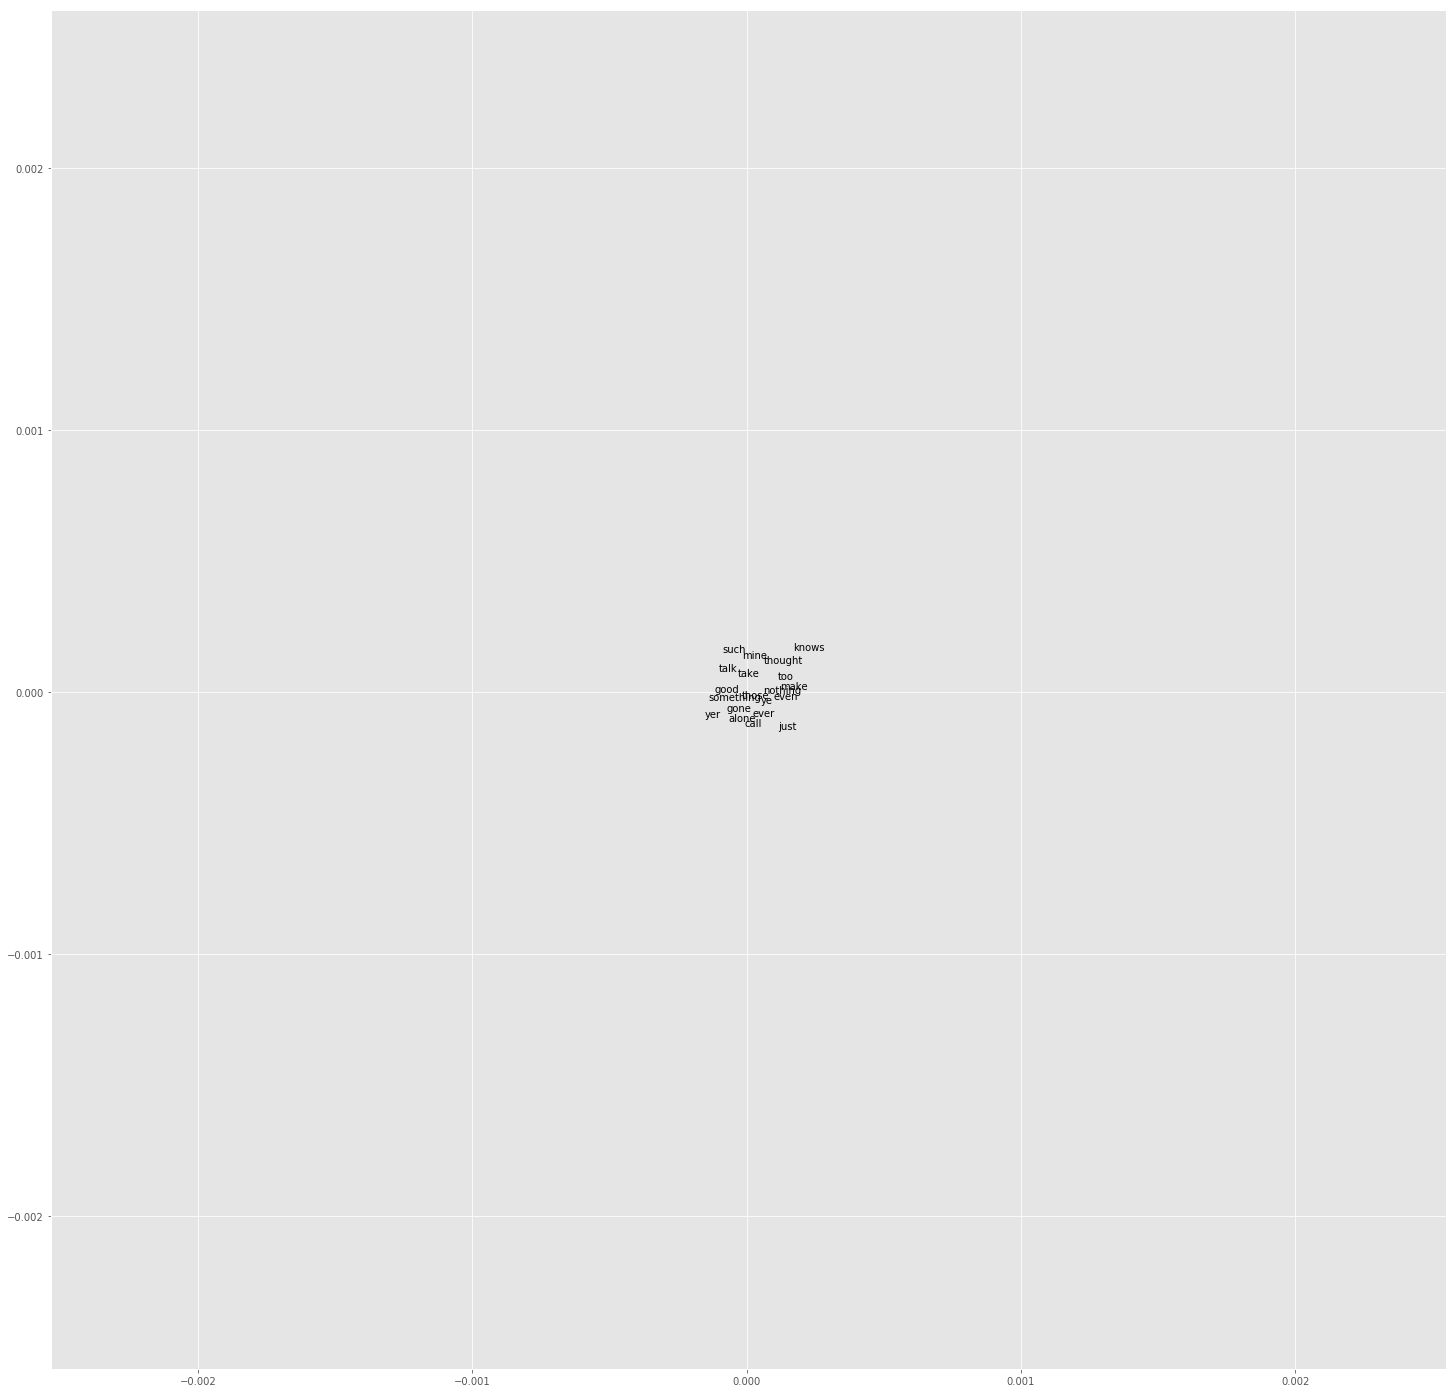

In [55]:
# Matplotlib

_, ax = plt.subplots(figsize=(25,25))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(god_tokens[i], ((embeddings[i,0], embeddings[i,1])))

In [71]:
### Let's compare two word2vec models

meta1 = meta1.dropna(axis=0, subset=['FILENAME'])
meta2 = meta2.dropna(axis=0, subset=['FILENAME'])

In [72]:
# Same process as above

text_list1 = []

# Iterate through filenames in metadata table
for filename in meta1['FILENAME']:
    
    # Read in novel text as single string, make lowercase
    with open(corpus + filename, 'r') as file_in:
        text = file_in.read()
    
    # Add novel text as single string to master list
    text_list1.append(text)
    
text_list2 = []

for filename in meta2['FILENAME']:
    
    # Read in novel text as single string, make lowercase
    with open(corpus + filename, 'r') as file_in:
        text = file_in.read()
    
    # Add novel text as single string to master list
    text_list2.append(text)
    

In [74]:
# Sentence tokenize

sentences1 = [sentence for novel in text_list1 for sentence in sent_tokenize(novel)]

sentences2 = [sentence for novel in text_list2 for sentence in sent_tokenize(novel)]

In [75]:
# Word tokenize

words_by_sentence1 = [fast_tokenize(sentence.lower()) for sentence in sentences1]
words_by_sentence2 = [fast_tokenize(sentence.lower()) for sentence in sentences2]

In [90]:
# Train word2vec models using CBOW

model1 = gensim.models.Word2Vec(words_by_sentence1, size=100, window=5, \
                               min_count=5, sg=0, alpha=0.025, iter=5, batch_words=10000)

model2 = gensim.models.Word2Vec(words_by_sentence2, size=100, window=5, \
                               min_count=5, sg=0, alpha=0.025, iter=5, batch_words=10000)

In [92]:
# COMPARISON MODEL

def measure_semantic_shift_by_neighborhood(model1,model2,word,k=25,verbose=False):

	# Import function for cosine distance
	from scipy.spatial.distance import cosine
	
	# Check that this word is present in both models
	if not word in model1.wv.vocab or not word in model2.wv.vocab:
		print ("!! Word %s not present in both models." % word)
		return None
	
	# Get the two neighborhoods
	neighborhood1 = [w for w,c in model1.most_similar(positive=[word], topn=k)]
	neighborhood2 = [w for w,c in model2.most_similar(positive=[word], topn=k)]
    
    # If you want to create more robust vectors
	#neighborhood1 = [w for w,c in model1.most_similar(positive=[word, word2], negative=[word3, word4], topn=k)]
	#neighborhood2 = [w for w,c in model2.most_similar(positive=[word, word2], negative=[word3, word4], topn=k)]
	
	# Print?
	if verbose:
		print ('>> Neighborhood of associations of the word "%s" in model1:' % word)
		print (', '.join(neighborhood1))
		print
		print ('>> Neighborhood of associations of the word "%s" in model2:' % word)
		print (', '.join(neighborhood2))
	
	# Get the 'meta' neighborhood (both combined)
	meta_neighborhood = list(set(neighborhood1)|set(neighborhood2))
	
	# Filter the meta neighborhood so that it contains only words present in both models
	meta_neighborhood = [w for w in meta_neighborhood if w in model1.wv.vocab and w in model2.wv.vocab]
	
	# For both models, get a similarity vector between the focus word and all of the words in the meta neighborhood
	vector1 = [model1.similarity(word,w) for w in meta_neighborhood]
	vector2 = [model2.similarity(word,w) for w in meta_neighborhood]
	
	# Compute the cosine distance *between* those similarity vectors
	dist=cosine(vector1,vector2)
	
	# Return this cosine distance -- a measure of the relative semantic shift for this word between these two models
	return dist

In [93]:
# Run model

measure_semantic_shift_by_neighborhood(model1,model2, "god",k=25,verbose=True)

>> Neighborhood of associations of the word "god" in model1:
where, that, this, how, these, thy, when, one, nor, may, any, only, but, those, ye, who, made, about, still, so, mrs, here, us, make, it
>> Neighborhood of associations of the word "god" in model2:
where, down, he, who, us, to, this, that, how, when, for, these, one, about, feet, three, her, across, but, they, then, now, has, which, here


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


2.149595201839105e-08

In [105]:
### Words in relation to vectors

god_terms = model.most_similar(positive=['god'], topn=20)
god_terms = [word for word, score in god_terms]

# MAN
man_scores = []
woman_scores = []

for word in god_terms:
    score = model.similarity(word, 'man')
    man_scores.append(score)
    
for word in god_terms:
    score = model.similarity(word, 'woman')
    woman_scores.append(score)
    
len(man_scores), len(woman_scores)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  from ipykernel import kernelapp as app


(20, 20)

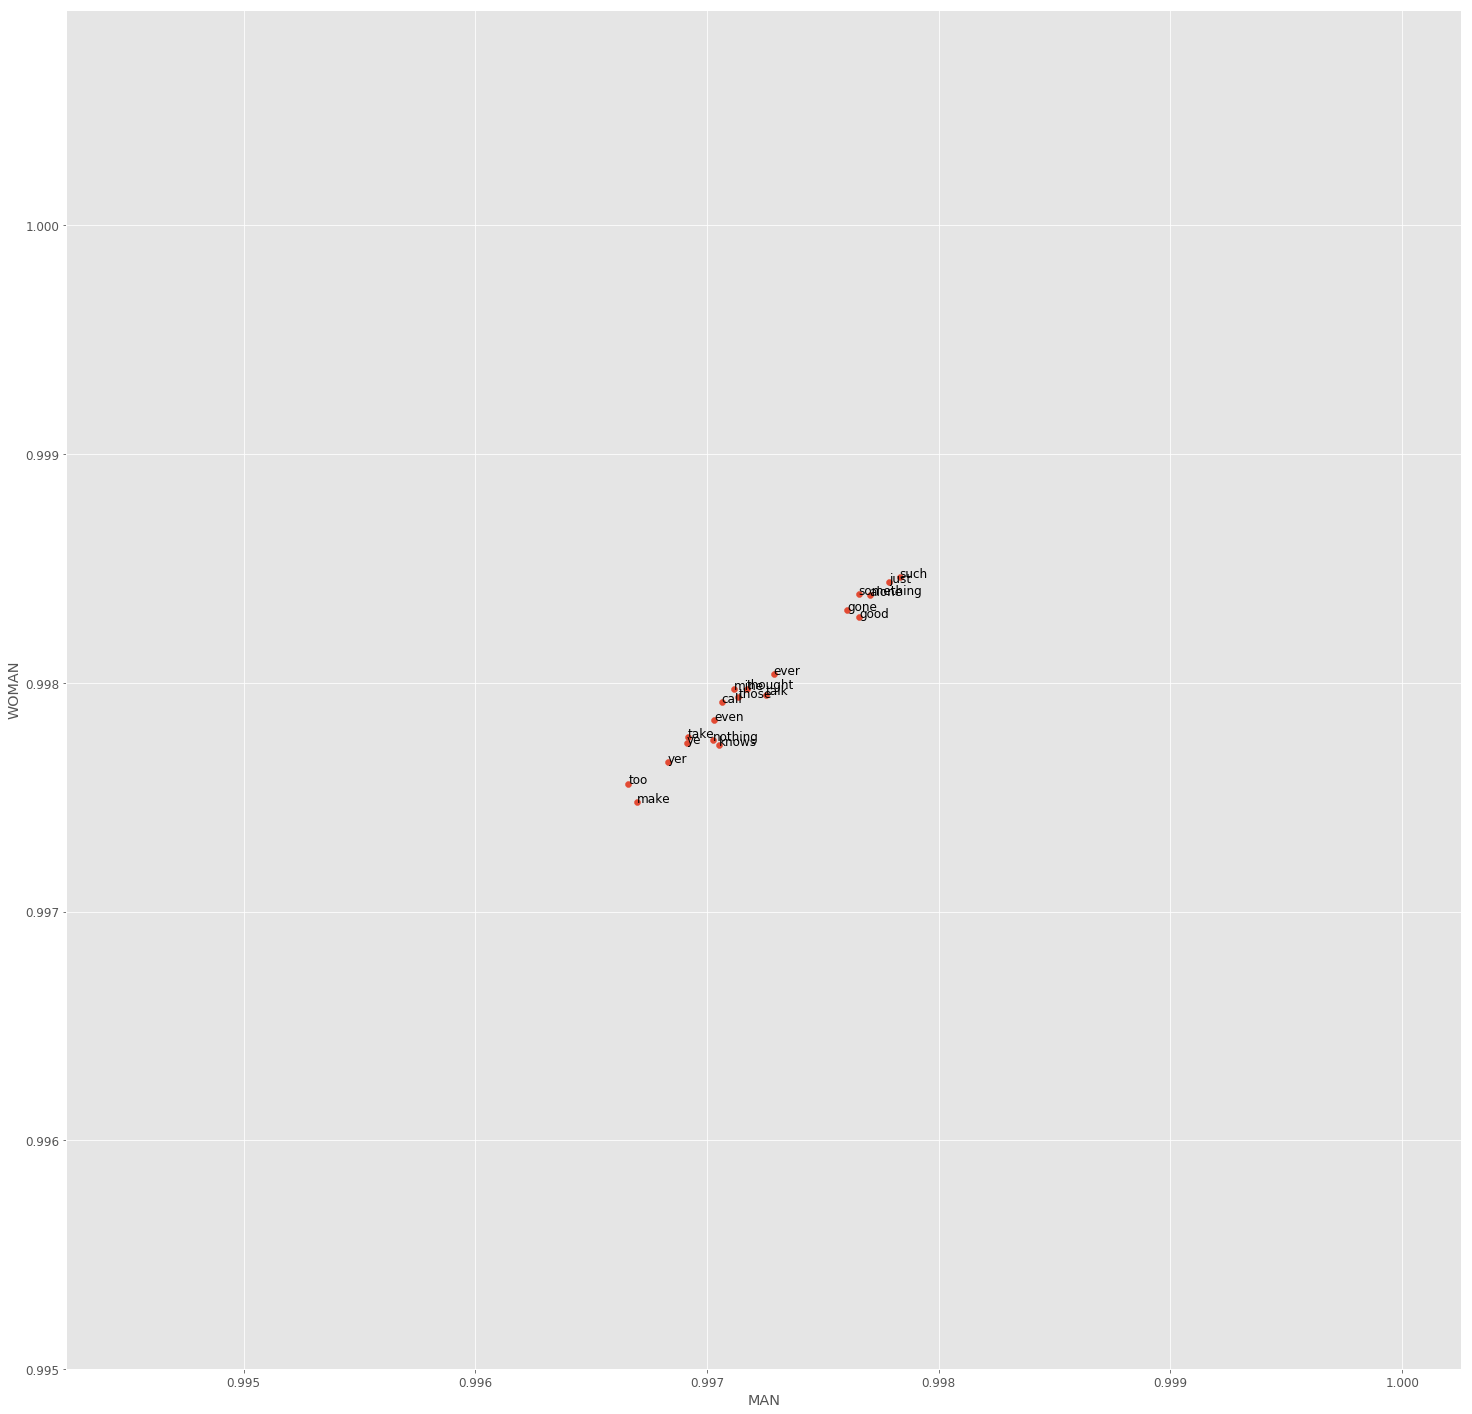

In [130]:
# Simple plot

plt.rcParams.update({'font.size': 12})
_, ax = plt.subplots(figsize=(25, 25))
ax.scatter(man_scores, woman_scores)
plt.xlabel ('MAN')
plt.ylabel ('WOMAN')

for i, txt in enumerate(god_terms):
    ax.annotate(txt, (man_scores[i], woman_scores[i]))